In [249]:
# %pip install liac-arff

In [250]:
import numpy as np
import pandas as pd
import arff
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
data = arff.load(open('dataset_', 'r'))
df = pd.DataFrame(data['data'], columns=[a[0] for a in data['attributes']])
df.head()

,SubscriptionID,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,Address,State,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
0,180590686,"$ 30,000 - $39,999",RENTER,German,N,1,25-29,German,1 3RD PL UNIT 703,CA,LONG BEACH,LOS ANGELES,90802,$7.00 - $7.99,7Day,FM,0,CircAdm,NO
1,181401653,"$500,000 Plus",OWNER,unknown,Y,14,50-54,None,1 AVIGNON,CA,NEWPORT COAST,ORANGE,92657,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
2,180374685,"$100,000 - $124,999",OWNER,Italian,Y,7,45-49,English,1 BLACKSWAN,CA,IRVINE,ORANGE,92604,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
3,180703483,"$200,000 - $249,999",OWNER,English,N,23,55-59,English,1 BLUE HORIZON,CA,LAGUNA NIGUEL,ORANGE,92677,$1.00 - $1.99,SunOnly,MW,1,Internet,NO
4,180358906,"$ 50,000 - $59,999",OWNER,Italian,N,23,60-64,English,1 BRISA DEL LAGO,CA,RANCHO SANTA MARGARITA,ORANGE,92688,$8.00 - $8.99,Thu-Sun,MM,0,Crew,YES


In [252]:
df.shape

(15855, 19)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SubscriptionID      15855 non-null  int64 
 1   HH Income           15855 non-null  object
 2   Home Ownership      15855 non-null  object
 3   Ethnicity           15855 non-null  object
 4   dummy for Children  15855 non-null  object
 5   Year Of Residence   15855 non-null  int64 
 6   Age range           15747 non-null  object
 7   Language            14848 non-null  object
 8   Address             15855 non-null  object
 9   State               15855 non-null  object
 10  City                15855 non-null  object
 11  County              15855 non-null  object
 12  Zip Code            15855 non-null  int64 
 13  weekly fee          15669 non-null  object
 14  Deliveryperiod      15855 non-null  object
 15  Nielsen Prizm       15726 non-null  object
 16  reward program      15

In [254]:
df.describe(include = "all")

,SubscriptionID,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,Address,State,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
count,1.585500e+04,15855,15855,15855,15855,15855.000000,15747,14848,15855,15855,15855,15855,15855.000000,15669,15855,15726,15855.000000,15855,15855
unique,NaN,18,2,73,2,NaN,12,37,15742,1,56,4,NaN,14,28,9,NaN,51,2
top,NaN,"Under $20,000",OWNER,Hispanic,N,NaN,50-54,English,2000 MAIN ST,CA,ANAHEIM,ORANGE,NaN,$0.01 - $0.50,SunOnly,MW,NaN,Partner,NO
freq,NaN,1917,11690,4087,12397,NaN,1913,11005,3,15855,1567,14351,NaN,2950,6186,4040,NaN,4387,12818
mean,1.643729e+08,NaN,NaN,NaN,NaN,13.546137,NaN,NaN,NaN,NaN,NaN,NaN,92424.541911,NaN,NaN,NaN,1.100662,NaN,NaN
std,2.356755e+07,NaN,NaN,NaN,NaN,11.770368,NaN,NaN,NaN,NaN,NaN,NaN,733.648427,NaN,NaN,NaN,9.555332,NaN,NaN
min,1.100011e+08,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,90603.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,1.501824e+08,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,92627.000000,NaN,NaN,NaN,0.000000,NaN,NaN
50%,1.803333e+08,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,92688.000000,NaN,NaN,NaN,0.000000,NaN,NaN
75%,1.806362e+08,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,92806.000000,NaN,NaN,NaN,0.000000,NaN,NaN


In [255]:
df["SubscriptionID"].unique().size

15855

Findings:
- **Missing Values** - Columns like Age range, Language, weekly fee, and Nielsen Prizm have counts lower than the number of rows (15,855),
- **Non-Informative Feature** - The State column has only 1 unique value ('CA') for all records,
- **Class Imbalance** - The target variable Subscriber is imbalanced, with the majority class 'NO' accounting for ~81% of the data (12,818 out of 15,855),
- **Categorical Features** - Several columns (e.g.  Ethnicity, City) are categorical strings and will require encoding (e.g., One-Hot Encoding),
- **Potential Outlier** - The reward program feature shows a large discrepancy between the mean (1.1) and the maximum value (353), suggesting a highly skewed distribution or outliers,
- **Identifiers** - SubscriptionID is a numerical identifier and will be removed from the feature set as it does not carry predictive information. Address also has very high variety (each is repeated max 3 times).

In [256]:
global_mean = df['Subscriber'].value_counts(normalize=True)['YES']
print(global_mean)

0.19154840744244717


Only **19%** of subscriber is "YES"

## Correlation Matrix

Let's create correlation Matrix only for numerical clumns

I convert some of the object columns to use them in the correlation matrix

In [257]:
df['is_home_owner'] = (df['Home Ownership'] == 'OWNER').astype(int)
df['has_children'] = (df['dummy for Children'] == 'Y').astype(int)
df['Subscriber'] = (df['Subscriber'] == 'YES').astype(int)

df.drop(columns=['Home Ownership','dummy for Children'], inplace = True)

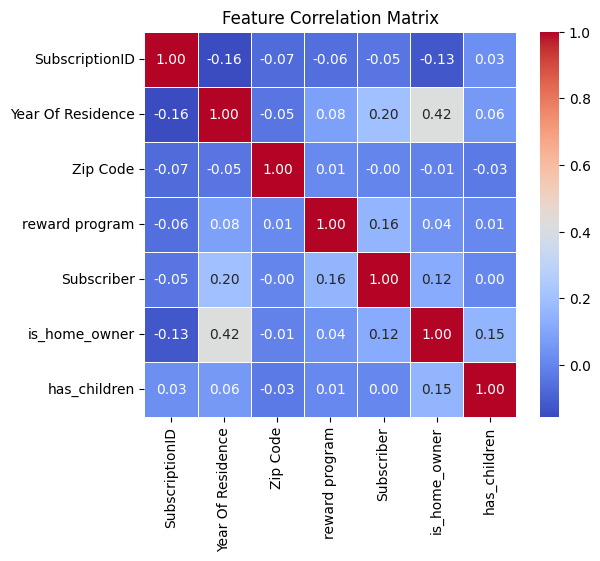

In [258]:
df_corr = df.copy()

correlation_matrix = df_corr.select_dtypes(include=['int64']).corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Subscriber is a little correlated with Year Of Residence (0.20), reward program (0.16) and is_home_owner (0.12)

## Unnecessary columns

SubscriptionID - Every SubscriptionID is unique

Address -  Almost every Address is unique

State - There's only 1 state

In [259]:
df.drop(columns=['SubscriptionID', 'Address','State'], inplace = True)

In [260]:
print(df["Zip Code"].unique().size)
print(df["City"].unique().size)

117
56


I will use only one of them for the model.

The Zip Code column gives the false impression of a numerical value and has many more unique values, so i choose the city column.

In [261]:
df.drop(columns=['Zip Code'], inplace = True)

## missing values:

In [262]:
df["Ethnicity"].unique()

array(['German', 'unknown', 'Italian', 'English', 'Scottish (Scotch)',
       'Hispanic', 'Chinese', 'Irish', 'Swedish', 'Filipino (Philippine)',
       'Jewish', 'Arab', 'Japanese', 'Indian', 'Vietnamese', 'Persian',
       'French', 'Korean', 'Turkish', 'Norwegian', 'Armenian', 'Austrian',
       'Polish', 'Portuguese', 'Dutch', 'Welsh', 'Belgian',
       'Byelorussian (Belarusian)', 'Czech', 'Thai', 'Ukrainian',
       'African (other)', 'Danish', 'Native American (American Indian)',
       'Zimbabwean', 'Hungarian', 'Russian', 'Pakistani', 'Greek',
       'Khmer (Kampuchean, Cambodian)', 'Lithuanian', 'Romanian',
       'African American 95%+', 'Egyptian', 'Finnish', 'Ethiopian',
       'multi-ethnic', 'Slovakian (Slovak)', 'Serbian', 'Swiss',
       'Laotian', 'Ugandan', 'Croatian', 'Ruandan (Rwandan)', 'Malawian',
       'Indonesian', 'Angolan', 'Latvian', 'Iraqi', 'Hawaiian', 'Syrian',
       'Luxembourgian', 'Albanian', 'Ghanaian', 'Slovenian (Slovene)',
       'Kenyan', 'Myanm

Ethnicity has a unique value called "Unknown"

In [263]:
print(df.isna().sum())
print("")
print("And", sum(df["Ethnicity"] == "unknown"), "unknowns in Ethnicity")

HH Income               0
Ethnicity               0
Year Of Residence       0
Age range             108
Language             1007
City                    0
County                  0
weekly fee            186
Deliveryperiod          0
Nielsen Prizm         129
reward program          0
Source Channel          0
Subscriber              0
is_home_owner           0
has_children            0
dtype: int64

And 1007 unknowns in Ethnicity


age range - 108

Ethnicity - 1007

language - 1007

weekly fee - 186

Nielsen Prizm - 129

Let's check if unknowns in Ethnicity and NaNs in langague are connected:

In [264]:
df.loc[(df["Ethnicity"] == "unknown") & ~(df["Language"].isna())].empty

True

Ethnicity = unknown <=> Language = NA

I fill NaNs in Language with "unknown". Other missing values i will repair later.

In [265]:
df['Language'] = df['Language'].fillna('unknown')

## Object columns with many various occurrences (Ethnicity, Language, City)

In [266]:
df.groupby(["Ethnicity", "Language"]).size().sort_values()

Ethnicity  Language
Albanian   English        1
Bhutanese  English        1
Estonian   English        1
Ghanaian   Ga             1
Iraqi      English        1
                       ... 
German     English      879
unknown    unknown     1007
Hispanic   English     1478
           Spanish     2609
English    English     3308
Length: 109, dtype: int64

only 109 combinations

In [267]:
df["Ethnicity"].unique().size, df["Language"].unique().size

(73, 38)

Let's check if some Ethnicities are special subscribers - "NO" (0) under 0.75 or over 0.90 because it's unusual and count over 10

In [268]:
cross_eth = pd.crosstab(df['Ethnicity'], df['Subscriber'], normalize='index')
cross_eth = cross_eth[(cross_eth[0]>0.9)|(cross_eth[0]<0.75)]
eth_cnt = df['Ethnicity'].value_counts()
eth_cnt = eth_cnt[eth_cnt>10].to_frame(name='count')
cross_eth.merge(eth_cnt, left_index=True, right_index=True, how='inner')

,0,1,count
Ethnicity,,,
Belgian,0.916667,0.083333,12
Czech,0.700000,0.300000,30
Dutch,0.745000,0.255000,200
German,0.746681,0.253319,904
Hungarian,0.913043,0.086957,46
Japanese,0.729064,0.270936,203
"Khmer (Kampuchean, Cambodian)",0.937500,0.062500,16
Lithuanian,0.727273,0.272727,11
Norwegian,0.709677,0.290323,62


adding those with count under 10 to other (they can be misleading and and it can reduce the number of columns after encoding)

In [269]:
eth_cnt = df['Ethnicity'].value_counts()
eth_cnt[eth_cnt<=10].size

34

In [270]:
major_ethnicities = eth_cnt[eth_cnt >10].index.tolist()
df['Ethnicity_filtered'] = df['Ethnicity'].apply(lambda x: x if x in major_ethnicities else 'Other Ethnicity')

Almost the half of unique Ethnicities are gone

Let's visualize the current distribution of the average percentage of subscribers by ethnicity

In [271]:
#auxiliary function
def scaler(v,x=1):
    return (v - v.min()) / (v.max() - v.min()) * x

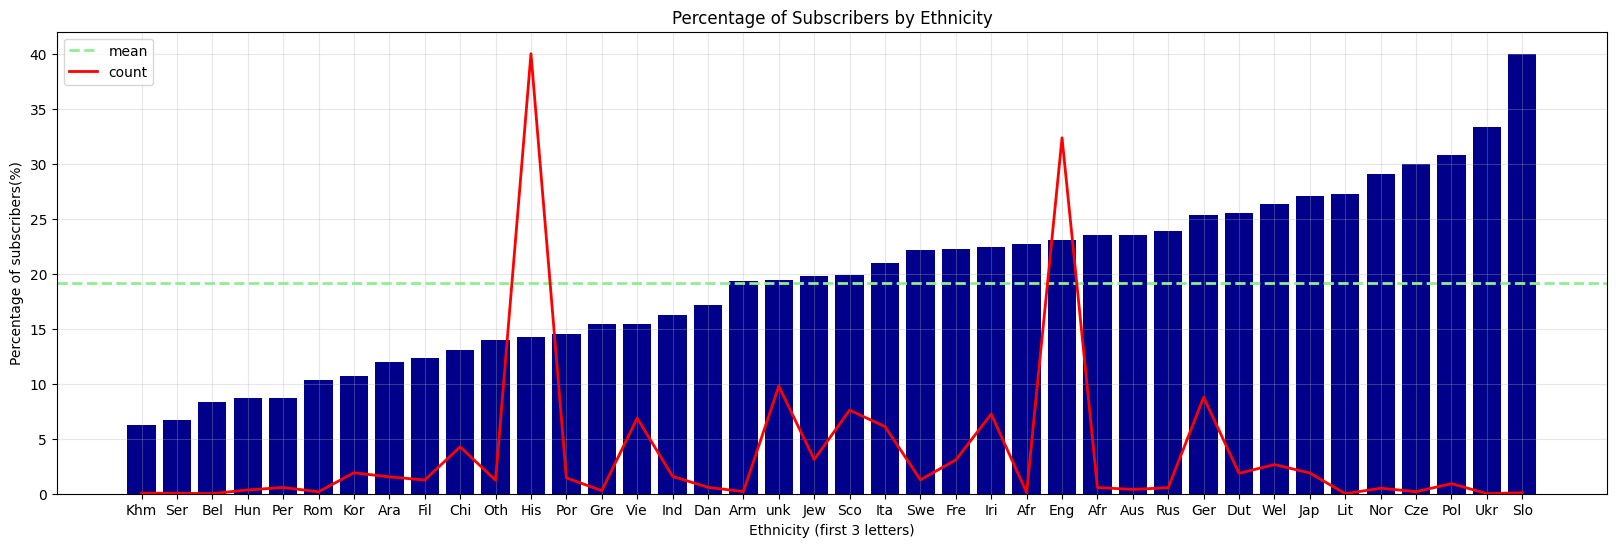

In [272]:
eth_cnt2 = df['Ethnicity_filtered'].value_counts()
cross_eth2 = pd.crosstab(df['Ethnicity_filtered'], df['Subscriber'], normalize='index')[1].sort_values()
short_labels = [str(x)[:3] for x in cross_eth2.index]
plt.figure(figsize=(20, 6))
plt.bar(cross_eth2.index, cross_eth2 * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=2, label='mean')
plt.plot(scaler(eth_cnt2[cross_eth2.index],40), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Ethnicity')
plt.xlabel('Ethnicity (first 3 letters)')
plt.ylabel('Percentage of subscribers(%)')
plt.xticks(ticks=range(len(cross_eth2.index)), labels=short_labels)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Similarly for Language and Cities:

special languages:

In [273]:
cross_lang = pd.crosstab(df['Language'], df['Subscriber'], normalize='index')
cross_lang = cross_lang[(cross_lang[0]>0.9)|(cross_lang[0]<0.75)]
Lang_cnt = df['Language'].value_counts()
Lang_cnt = Lang_cnt[Lang_cnt > 10].to_frame(name='count')
cross_lang.merge(Lang_cnt, left_index=True, right_index=True, how='inner')

,0,1,count
Language,,,
Chinese,0.913043,0.086957,161
Hebrew,1.000000,0.000000,15
Korean,0.929204,0.070796,113
Romanian,0.933333,0.066667,15


chinese and korean languages show signs to be reluctant subscribers

In [274]:
lang_cnt = df['Language'].value_counts()
lang_cnt[lang_cnt<=10].size

23

Over the half of languages will be gone

In [275]:
major_languages = Lang_cnt[Lang_cnt > 10].index.tolist()
df['Language_filtered'] = df['Language'].apply(lambda x: x if x in major_languages else 'Other Language')

Visualization:

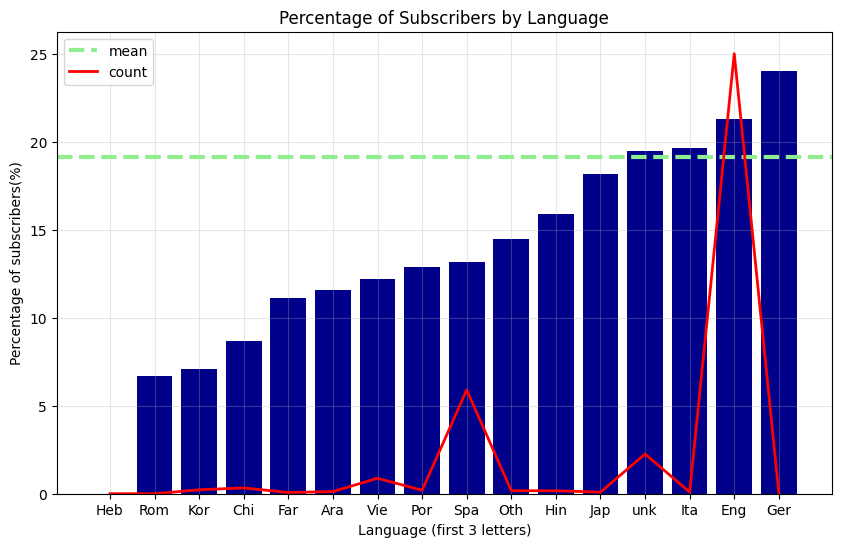

In [276]:
lang_cnt2 = df["Language_filtered"].value_counts()
cross_lang2 = pd.crosstab(df['Language_filtered'], df['Subscriber'], normalize='index')[1].sort_values()
short_labels = [str(x)[:3] for x in cross_lang2.index]
plt.figure(figsize=(10, 6))
plt.bar(cross_lang2.index, cross_lang2 * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(scaler(lang_cnt2[cross_lang2.index],25), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Language')
plt.xlabel('Language (first 3 letters)')
plt.ylabel('Percentage of subscribers(%)')
plt.xticks(ticks=range(len(cross_lang2.index)), labels=short_labels)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

And cities:

In [277]:
df['City'].unique().size

56

Special cities:

In [278]:
cross_city = pd.crosstab(df['City'], df['Subscriber'], normalize='index')
cross_city = cross_city[(cross_city[0]>0.9)|(cross_city[0]<0.75)]
city_cnt = df['City'].value_counts()
city_cnt = city_cnt[city_cnt>10].to_frame(name='count')
cross_city.merge(city_cnt, left_index=True, right_index=True, how='inner')

,0,1,count
City,,,
CAPISTRANO BEACH,0.666667,0.333333,27
CHINO HILLS,0.734940,0.265060,83
LA PALMA,0.680000,0.320000,75
MIDWAY CITY,0.653846,0.346154,26
MISSION VIEJO,0.741414,0.258586,495
SEAL BEACH,0.702128,0.297872,141
VILLA PARK,0.552632,0.447368,38
YORBA LINDA,0.736434,0.263566,387


Let's add to other those with count under 25

In [279]:
city_cnt = df['City'].value_counts()
city_cnt[city_cnt<=25].size

6

In [280]:
top_cities = city_cnt[city_cnt > 25].index.tolist()
df['City_filtered'] = df['City'].apply(lambda x: x if x in top_cities else 'Other City')

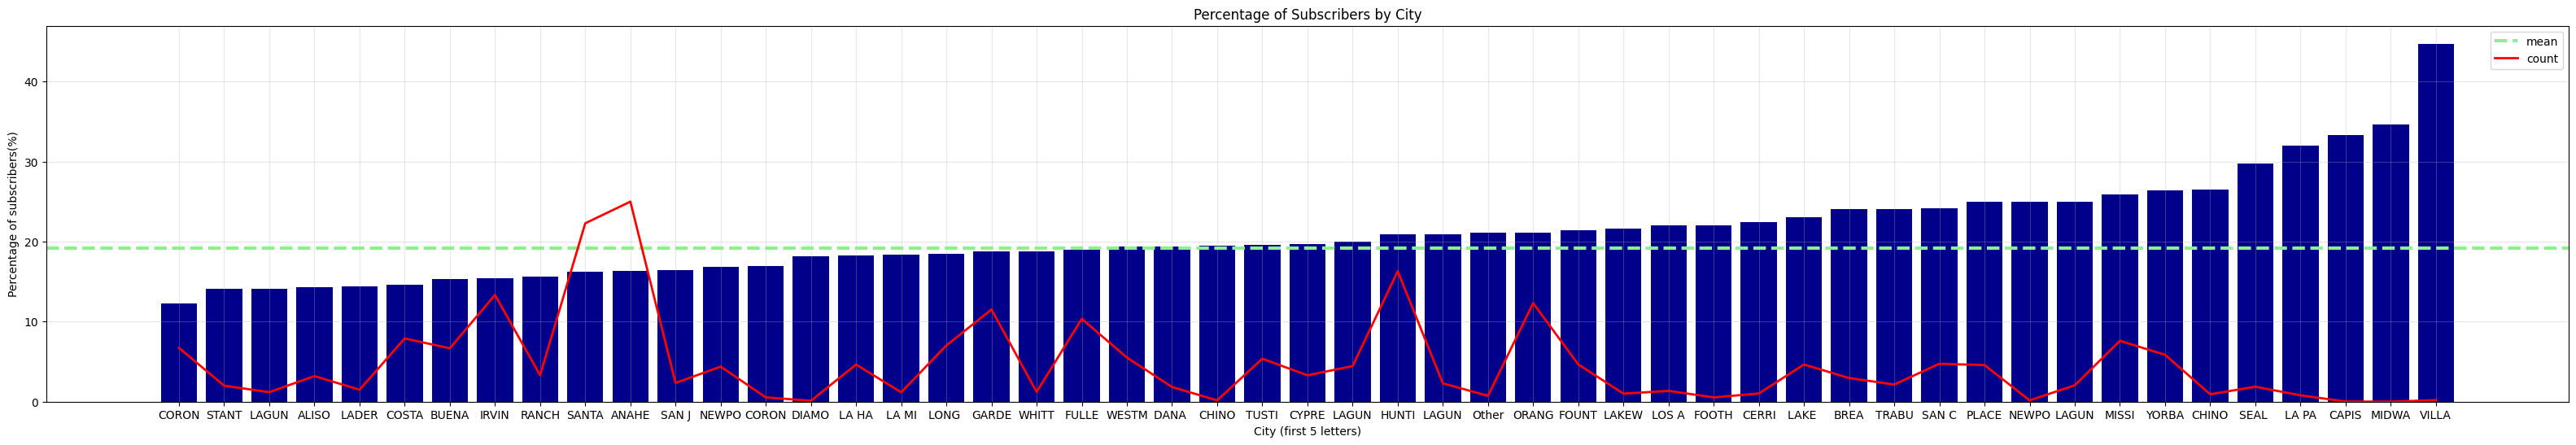

In [281]:
city_cnt2 = df["City_filtered"].value_counts()
cross_city2 = pd.crosstab(df['City_filtered'], df['Subscriber'], normalize='index')[1].sort_values()
short_labels = [str(x)[:5] for x in cross_city2.index]
plt.figure(figsize=(40, 6))
plt.bar(cross_city2.index, cross_city2 * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(scaler(city_cnt2[cross_city2.index],25), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by City')
plt.xlabel('City (first 5 letters)')
plt.ylabel('Percentage of subscribers(%)')
plt.xticks(ticks=range(len(cross_city2.index)), labels=short_labels)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Dealing with range columns (weekly fee, age range, HH income)

In [282]:
print(df["weekly fee"].unique())
print(df["HH Income"].unique())
print(df["Age range"].unique())

['$7.00 - $7.99' '$0.01 - $0.50' '$1.00 - $1.99' '$8.00 - $8.99'
 '$0 - $0.01' '$2.00 - $2.99' '$9.00 - $9.99' '$4.00 - $4.99'
 '$0.51 - $0.99' '$3.00 - $3.99' '$5.00 - $5.99' '$6.00 - $6.99'
 '$10.00 - $10.99' None '$0']
['$  30,000 - $39,999' '$500,000 Plus' '$100,000 - $124,999'
 '$200,000 - $249,999' '$  50,000 - $59,999' '$150,000 - $174,999'
 '$400,000 - $499,999' '$175,000 - $199,999' '$125,000 - $149,999'
 'Under $20,000' '$  80,000 - $89,999' '$  90,000 - $99,999'
 '$300,000 - $399,999' '$  20,000 - $29,999' '$  70,000 - $79,999'
 '$  60,000 - $69,999' '$  40,000 - $49,999' '$250,000 - $299,999']
['25-29' '50-54' '45-49' '55-59' '60-64' '75 years or more' '65-69'
 '70-74' '40-44' '24 years or less' '35-39' '30-34' None]


Let's set them as the mean value of the range (to become a numerical columns)

In [283]:
income = {'Under $20,000': 10000.0, '$  20,000 - $29,999': 25000.0, '$  30,000 - $39,999': 35000.0,
        '$  40,000 - $49,999': 45000.0,'$  50,000 - $59,999': 55000.0,'$  60,000 - $69,999': 65000.0,
        '$  70,000 - $79,999': 75000.0, '$  80,000 - $89,999': 85000.0,'$  90,000 - $99,999': 95000.0,
        '$100,000 - $124,999': 112500.0,'$125,000 - $149,999': 137500.0,'$150,000 - $174,999': 162500.0,
        '$175,000 - $199,999': 187500.0,'$200,000 - $249,999': 225000.0,'$250,000 - $299,999': 275000.0,
        '$300,000 - $399,999': 350000.0,'$400,000 - $499,999': 450000.0,'$500,000 Plus': 750000.0}

fee = {'$0': 0.0,'$0 - $0.01': 0.005,'$0.01 - $0.50': 0.255,
    '$0.51 - $0.99': 0.75,'$1.00 - $1.99': 1.50,'$2.00 - $2.99': 2.50,
    '$3.00 - $3.99': 3.50,'$4.00 - $4.99': 4.50,'$5.00 - $5.99': 5.50,
    '$6.00 - $6.99': 6.50,'$7.00 - $7.99': 7.50,'$8.00 - $8.99': 8.50,
    '$9.00 - $9.99': 9.50,'$10.00 - $10.99': 10.50}

age = {'24 years or less': 21.0,'25-29': 27.0,'30-34': 32.0,
        '35-39': 37.0,'40-44': 42.0,'45-49': 47.0,
        '50-54': 52.0,'55-59': 57.0,'60-64': 62.0,
        '65-69': 67.0,'70-74': 72.0,'75 years or more': 80.0}

df['HH Income'] = df['HH Income'].astype('category').cat.rename_categories(income).astype(float)
df['weekly fee'] = df['weekly fee'].astype('category').cat.rename_categories(fee).astype(float)
df['Age'] = df['Age range'].astype('category').cat.rename_categories(age).astype(float)


In [284]:
df.head()

,HH Income,Ethnicity,Year Of Residence,Age range,Language,City,County,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber,is_home_owner,has_children,Ethnicity_filtered,Language_filtered,City_filtered,Age
0,35000.0,German,1,25-29,German,LONG BEACH,LOS ANGELES,7.500,7Day,FM,0,CircAdm,0,0,0,German,German,LONG BEACH,27.0
1,750000.0,unknown,14,50-54,unknown,NEWPORT COAST,ORANGE,0.255,SunOnly,MW,0,Partner,1,1,1,unknown,unknown,NEWPORT COAST,52.0
2,112500.0,Italian,7,45-49,English,IRVINE,ORANGE,0.255,SunOnly,MW,0,Partner,1,1,1,Italian,English,IRVINE,47.0
3,225000.0,English,23,55-59,English,LAGUNA NIGUEL,ORANGE,1.500,SunOnly,MW,1,Internet,0,1,0,English,English,LAGUNA NIGUEL,57.0
4,55000.0,Italian,23,60-64,English,RANCHO SANTA MARGARITA,ORANGE,8.500,Thu-Sun,MM,0,Crew,1,1,0,Italian,English,RANCHO SANTA MARGARITA,62.0


column Age range won't be needed anymore

In [285]:
df.drop(columns='Age range', inplace=True)

Visualization for Age column:

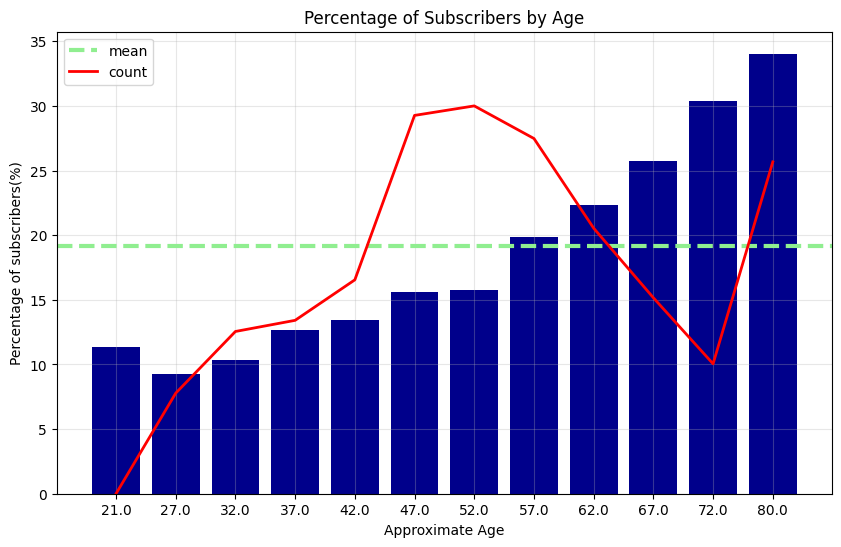

In [286]:
age_cnt = df['Age'].value_counts()
cross_age = pd.crosstab(df['Age'], df['Subscriber'], normalize='index')[1]
plt.figure(figsize=(10, 6))
plt.bar(cross_age.index.astype(str), cross_age * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(cross_age.index.astype(str), scaler(age_cnt[cross_age.index],30), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Age')
plt.xlabel('Approximate Age')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

there is a noticeable (positive) relation between age and being a subscriber

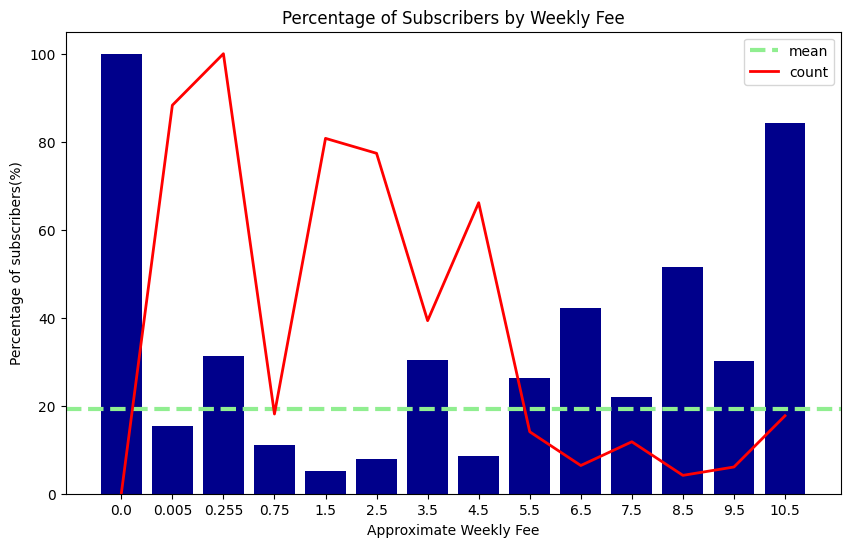

In [287]:
fee_cnt = df['weekly fee'].value_counts()
cross_fee = pd.crosstab(df['weekly fee'], df['Subscriber'], normalize='index')[1]
plt.figure(figsize=(10, 6))
plt.bar(cross_fee.index.astype(str), cross_fee * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(cross_fee.index.astype(str), scaler(fee_cnt[cross_fee.index],100), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Weekly Fee')
plt.xlabel('Approximate Weekly Fee')
plt.ylabel('Percentage of subscribers(%)')
plt.legend()
plt.show()

no noticeable relation

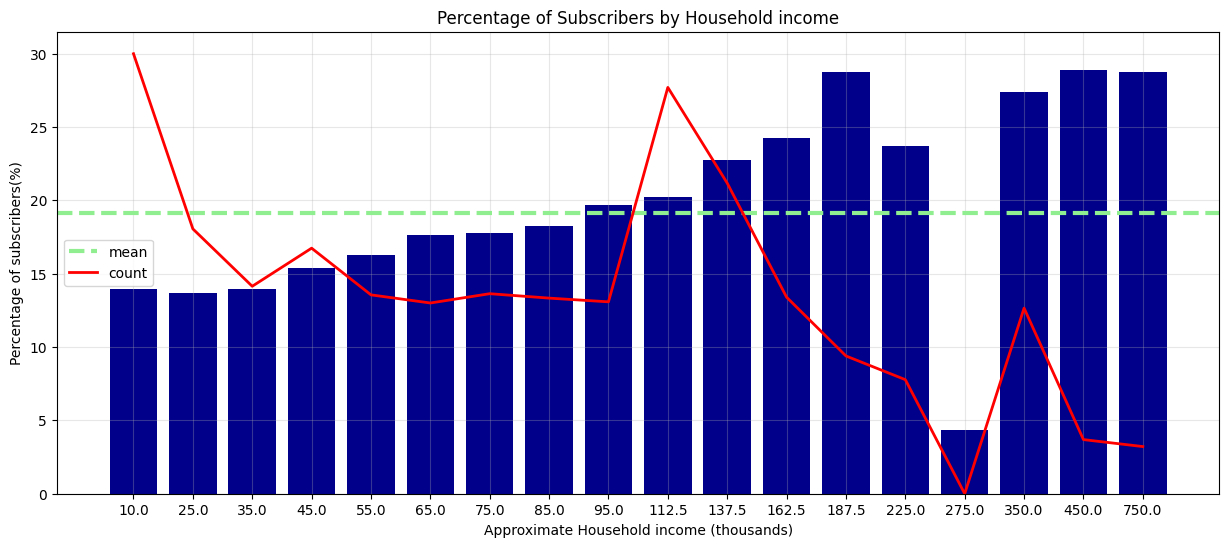

In [288]:
income_cnt = df['HH Income'].value_counts()
cross_income = pd.crosstab(df['HH Income']/1000, df['Subscriber'], normalize='index')[1]
plt.figure(figsize=(15, 6))
plt.bar(cross_income.index.astype(str), cross_income * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot((cross_income.index).astype(str), scaler(income_cnt[cross_income.index * 1000],30), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Household income')
plt.xlabel('Approximate Household income (thousands)')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

I see a slight proportionality between HH income and being a subscriber

## Deliveryperiod column

In [289]:
df["Deliveryperiod"].unique()

array(['7Day', 'SunOnly', 'Thu-Sun', 'SatSun', '7DayOL', 'SoooooS',
       'oMTWTFo', 'THU-SUN', 'Mon-Fri', '7DAY', 'SooooFS', 'SooooooT',
       '7DayT', 'Fri-Sun', 'SoooTFS', 'SunOnlyT', 'Soooooo', 'Thu-SunT',
       'Fri-SunT', 'SoooTFST', 'Sun-Fri', 'sunonly', 'SoooooST', '7day',
       'Sun-FriT', 'SUNONLY', 'thu-sun', 'SooooFST'], dtype=object)

I see some similar results. It should be cleaned. Also T OL can be special suffixes.

Let's clean the "Deliveryperiod" column and create 3 new features: "T", "OL", "Deliverydays"

In [290]:
df['T'] = df['Deliveryperiod'].astype(str).str.upper().str.endswith('T').astype(int)
df['OL'] = df['Deliveryperiod'].astype(str).str.upper().str.contains('OL').astype(int)

def clean_delivery_period(val):
    val = str(val).lower()
    if '7day' in val: return '7day'
    if 'sunonly' in val or 'soooooo' in val: return 'SunOnly'
    if 'thu-sun' in val or 'soootfs' in val: return 'Thu-Sun'
    if 'fri-sun' in val or 'soooofs' in val: return 'Fri-Sun'
    if 'satsun' in val or 'sooooos' in val: return 'Sat-Sun'
    if 'mon-fri' in val or 'omtwtfo' in val: return 'Mon-Fri'
    if 'sun-fri' in val: return 'Sun-Fri'

days_map = {'7day': 7,'Sun-Fri': 6,'Mon-Fri': 5,'Thu-Sun': 4,
                'Fri-Sun': 3,'Sat-Sun': 2,'SunOnly': 1}

df['Deliveryperiod_clean'] = df['Deliveryperiod'].apply(clean_delivery_period)
df['Deliverydays'] = df['Deliveryperiod_clean'].map(days_map)

In [291]:
df.head()

,HH Income,Ethnicity,Year Of Residence,Language,City,County,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,...,is_home_owner,has_children,Ethnicity_filtered,Language_filtered,City_filtered,Age,T,OL,Deliveryperiod_clean,Deliverydays
0,35000.0,German,1,German,LONG BEACH,LOS ANGELES,7.500,7Day,FM,0,...,0,0,German,German,LONG BEACH,27.0,0,0,7day,7
1,750000.0,unknown,14,unknown,NEWPORT COAST,ORANGE,0.255,SunOnly,MW,0,...,1,1,unknown,unknown,NEWPORT COAST,52.0,0,0,SunOnly,1
2,112500.0,Italian,7,English,IRVINE,ORANGE,0.255,SunOnly,MW,0,...,1,1,Italian,English,IRVINE,47.0,0,0,SunOnly,1
3,225000.0,English,23,English,LAGUNA NIGUEL,ORANGE,1.500,SunOnly,MW,1,...,1,0,English,English,LAGUNA NIGUEL,57.0,0,0,SunOnly,1
4,55000.0,Italian,23,English,RANCHO SANTA MARGARITA,ORANGE,8.500,Thu-Sun,MM,0,...,1,0,Italian,English,RANCHO SANTA MARGARITA,62.0,0,0,Thu-Sun,4


There's no need to keep both Deliveryperiod end Deliverydays. Derliverydays has a certain order. Let's see if it is related to subscriber column

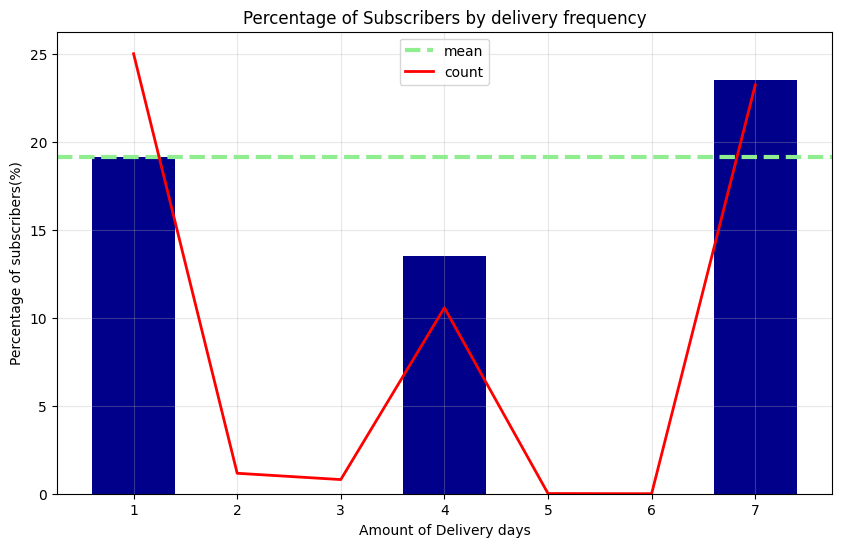

In [292]:
dd_cnt = df['Deliverydays'].value_counts()
cross_dd = pd.crosstab(df['Deliverydays'], df['Subscriber'], normalize='index')[1]
plt.figure(figsize=(10, 6))
plt.bar(cross_dd.index.astype(str), cross_dd * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(cross_dd.index.astype(str), scaler(dd_cnt[cross_dd.index],25), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by delivery frequency')
plt.xlabel('Amount of Delivery days')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

The amount of days as a numerical feature does not affect the subscriber value.

Checking relation with "T" and "OL" columns:

In [293]:
pd.crosstab(df['T'], df['Subscriber'], normalize='index')

Subscriber,0,1
T,,
0,0.803849,0.196151
1,1.000000,0.000000


with T always not a subscriber!

In [294]:
df['T'].value_counts()

T
0    15483
1      372
Name: count, dtype: int64

And appears in 372 rows

In [295]:
pd.crosstab(df['OL'], df['Subscriber'], normalize='index')

Subscriber,0,1
OL,,
0,0.805845,0.194155
1,0.995413,0.004587


with OL almost always not a subscriber!

In [296]:
df['OL'].value_counts()

OL
0    15637
1      218
Name: count, dtype: int64

And appears in 218 rows

## Source Channel column

In [297]:
df["Source Channel"].sort_values().unique(), df["Source Channel"].unique().size

(array(['AdvAdm', 'Agent', 'Assoc', 'CCAuto', 'CSR', 'Chat', 'CircAdm',
        'Contest', 'Counter', 'Crew', 'Crew1', 'Crew2', 'Crew3', 'Crew4',
        'CustCall', 'DIRECTM2', 'DIRECTM4', 'DTI', 'DirectMl', 'EMAIL4',
        'Email', 'Event', 'Event1', 'ExecAdm', 'FUSS', 'Gift', 'INTERNET',
        'InPaper', 'Internet', 'Internt4', 'Kiosk', 'Kiosk1', 'Kiosk2',
        'Kiosk3', 'Kiosk4', 'Kiosk5', 'OutMedia', 'PARTNER', 'Partner',
        'RetMail', 'RetenIn', 'RetenOut', 'SCINSRT4', 'SCINSRT6',
        'SCinsert', 'System', 'TMC', 'TeleIn', 'TeleOut', 'VRU',
        'iSrvices'], dtype=object),
 51)

Let's combine similar varieties again

In [298]:
def clean_source_channel(val):
    val = str(val).upper()
    
    if 'CREW' in val: return 'Crew'
    if 'KIOSK' in val: return 'Kiosk'
    if 'INTERNET' in val or 'INTERNT' in val: return 'Internet'
    if 'PARTNER' in val: return 'Partner'
    if 'DIRECTM' in val or 'DIRECTML' in val: return 'DirectMail'
    if 'SCINSRT' in val or 'SCINSERT' in val: return 'SCInsert'
    if 'EMAIL' in val: return 'Email'
    if 'EVENT' in val: return 'Event'
    if 'RETEN' in val: return 'Retention'

    return val.title()

df['Source_Channel_clean'] = df['Source Channel'].apply(clean_source_channel)

In [299]:
df["Source_Channel_clean"].unique()

array(['Circadm', 'Partner', 'Internet', 'Crew', 'Kiosk', 'SCInsert',
       'Telein', 'Custcall', 'Retention', 'DirectMail', 'Teleout', 'Vru',
       'System', 'Chat', 'Advadm', 'Tmc', 'Email', 'Inpaper', 'Assoc',
       'Event', 'Outmedia', 'Counter', 'Fuss', 'Csr', 'Isrvices',
       'Retmail', 'Gift', 'Agent', 'Execadm', 'Contest', 'Ccauto', 'Dti'],
      dtype=object)

Visualization:

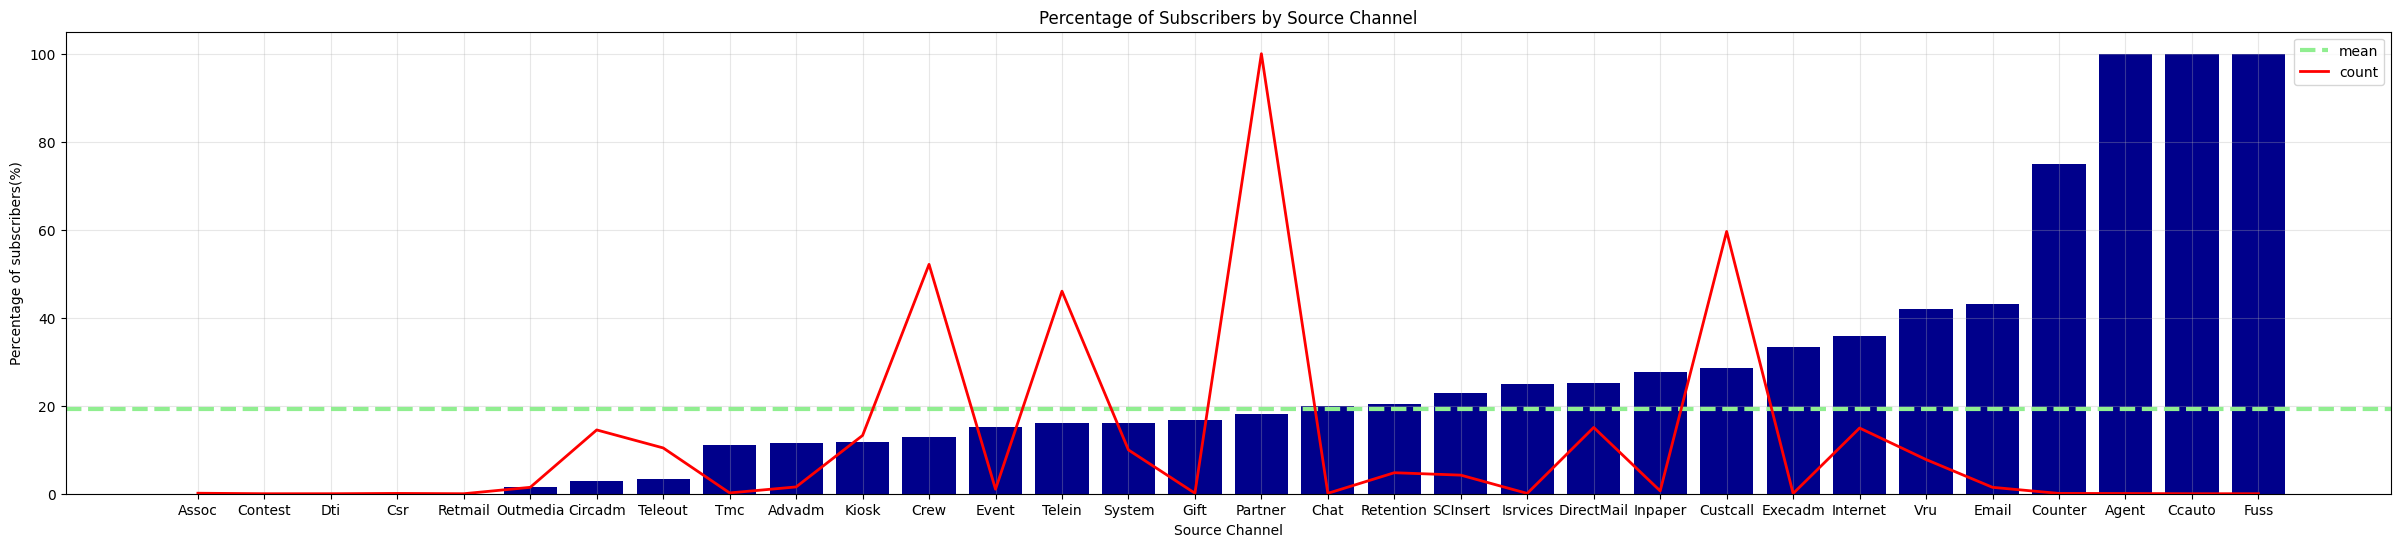

In [300]:
sc_cnt = df['Source_Channel_clean'].value_counts()
cross_sc = pd.crosstab(df['Source_Channel_clean'], df['Subscriber'], normalize='index')[1].sort_values()
plt.figure(figsize=(30, 6))
plt.bar(cross_sc.index, cross_sc * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(scaler(sc_cnt[cross_sc.index],100), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Source Channel')
plt.xlabel('Source Channel')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Let's check special Source Channels and maybe  add rare unique values to "Other" category

In [301]:
cross_sch = pd.crosstab(df['Source_Channel_clean'], df['Subscriber'], normalize='index')
cross_sch = cross_sch[(cross_sch[0]>0.9)|(cross_sch[0]<0.75)]
Sch_count = df['Source_Channel_clean'].value_counts()
Sch_count = Sch_count[Sch_count >10].to_frame(name='count')
cross_sch.merge(Sch_count, left_index=True, right_index=True, how='inner')

,0,1,count
Source_Channel_clean,,,
Circadm,0.971831,0.028169,639
Custcall,0.714939,0.285061,2624
DirectMail,0.748494,0.251506,664
Email,0.569231,0.430769,65
Inpaper,0.724138,0.275862,29
Internet,0.641337,0.358663,658
Outmedia,0.984615,0.015385,65
Teleout,0.967320,0.032680,459
Vru,0.580175,0.419825,343


In [302]:
counts = df['Source_Channel_clean'].value_counts()
top_channels = counts[counts > 10].index.tolist()
df['Source_Channel_clean'] = df['Source_Channel_clean'].apply(lambda x: x if x in top_channels else 'Other Channel')

New Visualization:

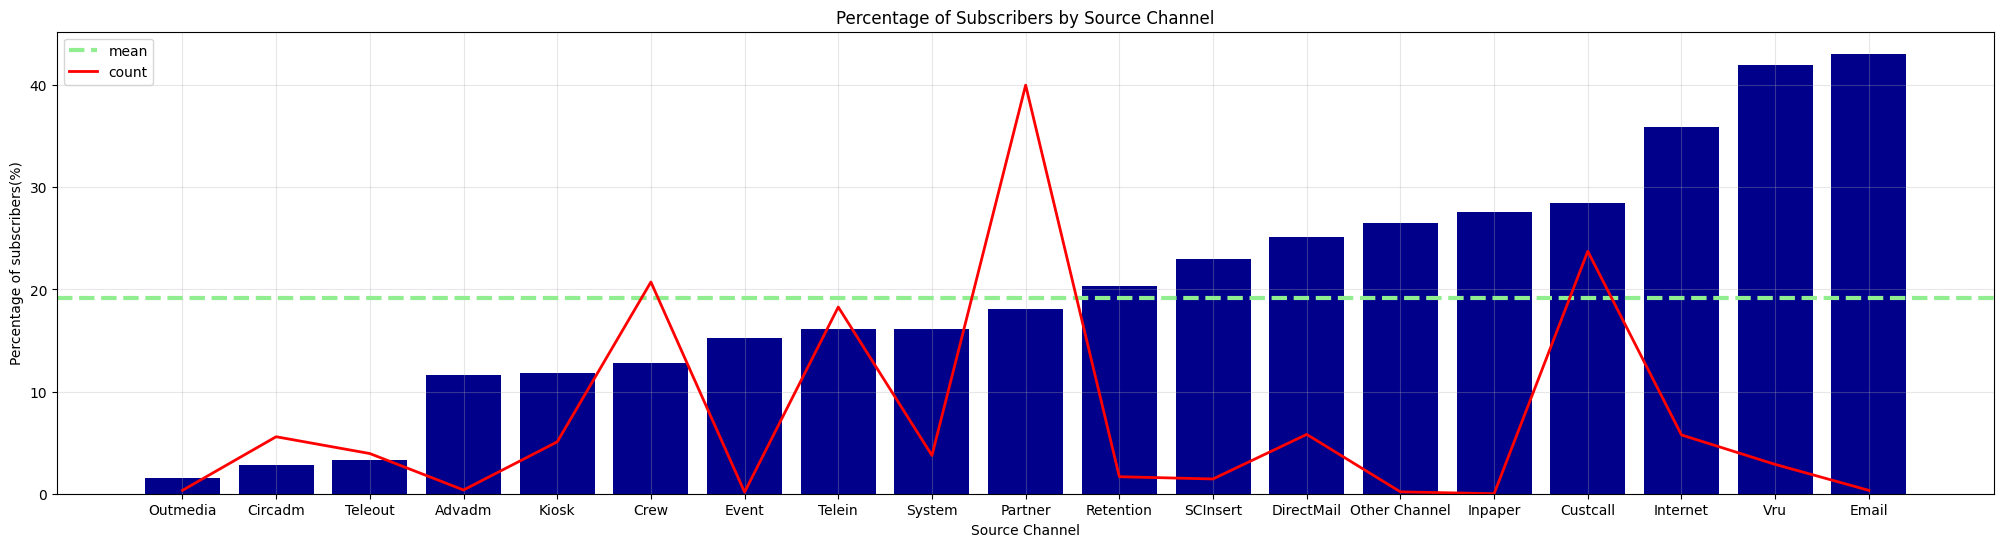

In [303]:
sc_cnt = df['Source_Channel_clean'].value_counts()
cross_sc = pd.crosstab(df['Source_Channel_clean'], df['Subscriber'], normalize='index')[1].sort_values()
plt.figure(figsize=(25, 6))
plt.bar(cross_sc.index, cross_sc * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(scaler(sc_cnt[cross_sc.index],40), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Source Channel')
plt.xlabel('Source Channel')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Dealing with missing values

Let's check the best correlations with other features for "Age", "weekly fee" and "Nielsen Prizm". Maybe we can use them to fill the gaps

In [304]:
targets = ['Age', 'weekly fee', 'Nielsen Prizm']

df_check = df.copy()

for col in df_check.select_dtypes(include=['object', 'category']).columns:
    df_check[col] = df_check[col].astype('category').cat.codes

corr_matrix = df_check.corr().abs()

print(corr_matrix['Age'].drop('Age').sort_values(ascending=False).head(1))
print(corr_matrix['weekly fee'].drop('weekly fee').sort_values(ascending=False).head(1))
print(corr_matrix['Nielsen Prizm'].drop('Nielsen Prizm').sort_values(ascending=False).head(1))

Year Of Residence    0.575567
Name: Age, dtype: float64
Deliverydays    0.621056
Name: weekly fee, dtype: float64
Language_filtered    0.127535
Name: Nielsen Prizm, dtype: float64


Age - Highest correlation with Years of residence (0.576) 

weekly fee - highest correlation with Delivery days (0.621)

filling the missing values for theese

In [305]:
df['weekly fee'] = df.groupby('Deliverydays')['weekly fee'].transform(
        lambda x: x.fillna(x.median()))
df['weekly fee'] = df['weekly fee'].fillna(df['weekly fee'].median())

df['Age'] = df.groupby('Year Of Residence')['Age'].transform(
        lambda x: x.fillna(x.median()))
df['Age'] = df['Age'].fillna(df['Age'].median())


But i fill Niesen Prizm with new category "unknown NP" (Nieseln Prizm has only 9 variours values)

In [306]:
df['Nielsen Prizm'] = df['Nielsen Prizm'].fillna('Unknown NP')

In [307]:
df.isna().sum()

HH Income               0
Ethnicity               0
Year Of Residence       0
Language                0
City                    0
County                  0
weekly fee              0
Deliveryperiod          0
Nielsen Prizm           0
reward program          0
Source Channel          0
Subscriber              0
is_home_owner           0
has_children            0
Ethnicity_filtered      0
Language_filtered       0
City_filtered           0
Age                     0
T                       0
OL                      0
Deliveryperiod_clean    0
Deliverydays            0
Source_Channel_clean    0
dtype: int64

## Checking relation with other columns

Nielsen Prizm:

In [308]:
pd.crosstab(df['Nielsen Prizm'], df['Subscriber'], normalize='index')

Subscriber,0,1
Nielsen Prizm,,
FE,0.867785,0.132215
FM,0.825205,0.174795
FW,0.760000,0.240000
ME,0.858679,0.141321
MM,0.778458,0.221542
MW,0.756188,0.243812
Unknown NP,0.860465,0.139535
YE,0.862745,0.137255
YM,0.886123,0.113877


Nothing relevant

County:

In [309]:
pd.crosstab(df['County'], df['Subscriber'], normalize='index')

Subscriber,0,1
County,,
LOS ANGELES,0.804772,0.195228
ORANGE,0.806982,0.193018
RIVERSIDE,0.874730,0.125270
SAN BERNARDINO,0.756303,0.243697


Nothing Serious

Year Of Residence:

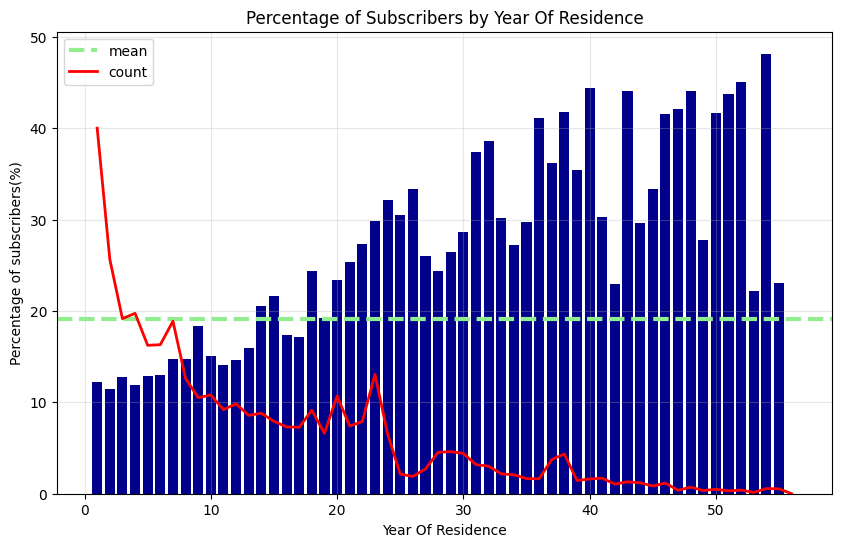

In [310]:
YoR_cnt = df['Year Of Residence'].value_counts()
cross_YoR = pd.crosstab(df['Year Of Residence'], df['Subscriber'], normalize='index')[1]
plt.figure(figsize=(10, 6))
plt.bar(cross_YoR.index, cross_YoR * 100, color='darkblue')
plt.axhline(global_mean * 100, color='lightgreen',linestyle = '--', linewidth=3, label='mean')
plt.plot(scaler(YoR_cnt[cross_YoR.index],40), color='red',linewidth=2, label='count')
plt.title('Percentage of Subscribers by Year Of Residence')
plt.xlabel('Year Of Residence')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

slight relation between Year of Residence and being a subscriber (it's mostly growing), but the amount of people decreases with age. 

In [311]:
pd.crosstab(df['is_home_owner'], df['Subscriber'], normalize='index')

Subscriber,0,1
is_home_owner,,
0,0.884994,0.115006
1,0.781180,0.218820


Home owners are more often subscribers

In [312]:
pd.crosstab(df['has_children'], df['Subscriber'], normalize='index')

Subscriber,0,1
has_children,,
0,0.809147,0.190853
1,0.805957,0.194043


## reward program

In [313]:
df["reward program"].value_counts().head(20)

reward program
0     14862
1       232
2       113
3        90
4        60
5        53
6        42
8        28
7        24
11       20
9        19
14       16
12       15
24       11
10       11
13       10
16       10
25        9
21        8
32        8
Name: count, dtype: int64

Count for unique values in reward program is decreasing

Let's check which of them have tendecy to be subscribers:

In [314]:
cnt = pd.crosstab(df['reward program'], df['Subscriber'], normalize='index')
cnt = cnt[cnt[0]<0.60]
count = df['reward program'].value_counts()
cnt.merge(count, left_index=True, right_index=True, how='inner')

,0,1,count
reward program,,,
1,0.435345,0.564655,232
2,0.442478,0.557522,113
3,0.511111,0.488889,90
4,0.383333,0.616667,60
5,0.301887,0.698113,53
...,...,...,...
212,0.000000,1.000000,1
216,0.000000,1.000000,1
244,0.000000,1.000000,1


In [315]:
cnt.merge(count, left_index=True, right_index=True, how='inner')['count'].size, df['reward program'].unique().size

(97, 116)

Almost every of them (except 0) have tendency to be relatively high tendency to be a subscriber.

Visualization:

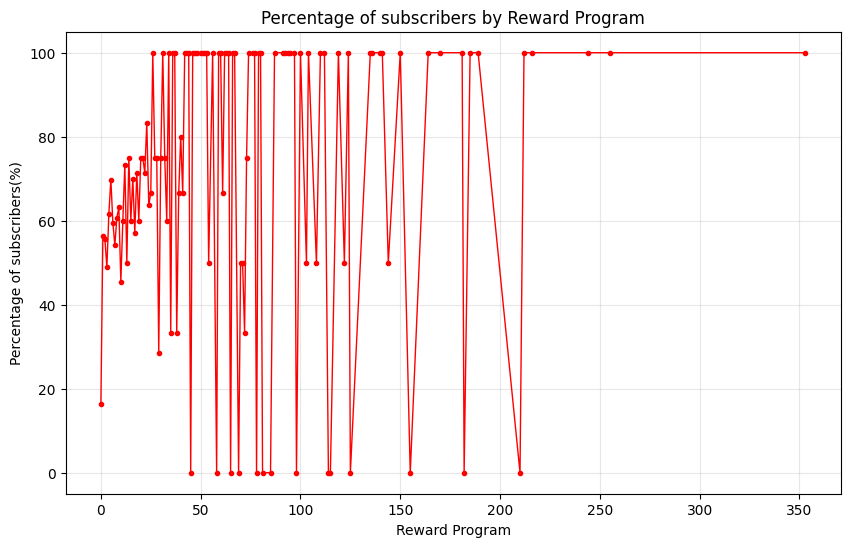

In [316]:
cnt = pd.crosstab(df['reward program'], df['Subscriber'], normalize='index')[1]
plt.figure(figsize=(10, 6))
plt.plot(cnt.index, cnt * 100, marker='.', linestyle='-',linewidth = 1, color='red')
plt.title('Percentage of subscribers by Reward Program')
plt.xlabel('Reward Program')
plt.ylabel('Percentage of subscribers(%)')
plt.grid(True, alpha=0.3)
plt.show()

Let's create a new column: has reward

In [317]:
df['Has_Reward'] = (df['reward program'] > 0).astype(int)
pd.crosstab(df['Has_Reward'], df['Subscriber'], normalize='index')

Subscriber,0,1
Has_Reward,,
0,0.836832,0.163168
1,0.383686,0.616314


Most people who have reward program are subscribers

Let's drop uncleaned and unnecessary columns now 

(dropping 'Deliverydays' because, as we saw, The amount of days as a numerical feature does not affect the subscriber status)

In [318]:
df_clean = df.drop(columns=['Language', 'Ethnicity', 'City', 'reward program',
                            'Deliveryperiod', 'Deliverydays', 'Source Channel'])

In [319]:
df_clean.head()

,HH Income,Year Of Residence,County,weekly fee,Nielsen Prizm,Subscriber,is_home_owner,has_children,Ethnicity_filtered,Language_filtered,City_filtered,Age,T,OL,Deliveryperiod_clean,Source_Channel_clean,Has_Reward
0,35000.0,1,LOS ANGELES,7.500,FM,0,0,0,German,German,LONG BEACH,27.0,0,0,7day,Circadm,0
1,750000.0,14,ORANGE,0.255,MW,1,1,1,unknown,unknown,NEWPORT COAST,52.0,0,0,SunOnly,Partner,0
2,112500.0,7,ORANGE,0.255,MW,1,1,1,Italian,English,IRVINE,47.0,0,0,SunOnly,Partner,0
3,225000.0,23,ORANGE,1.500,MW,0,1,0,English,English,LAGUNA NIGUEL,57.0,0,0,SunOnly,Internet,1
4,55000.0,23,ORANGE,8.500,MM,1,1,0,Italian,English,RANCHO SANTA MARGARITA,62.0,0,0,Thu-Sun,Crew,0


## New Correlation Matrix

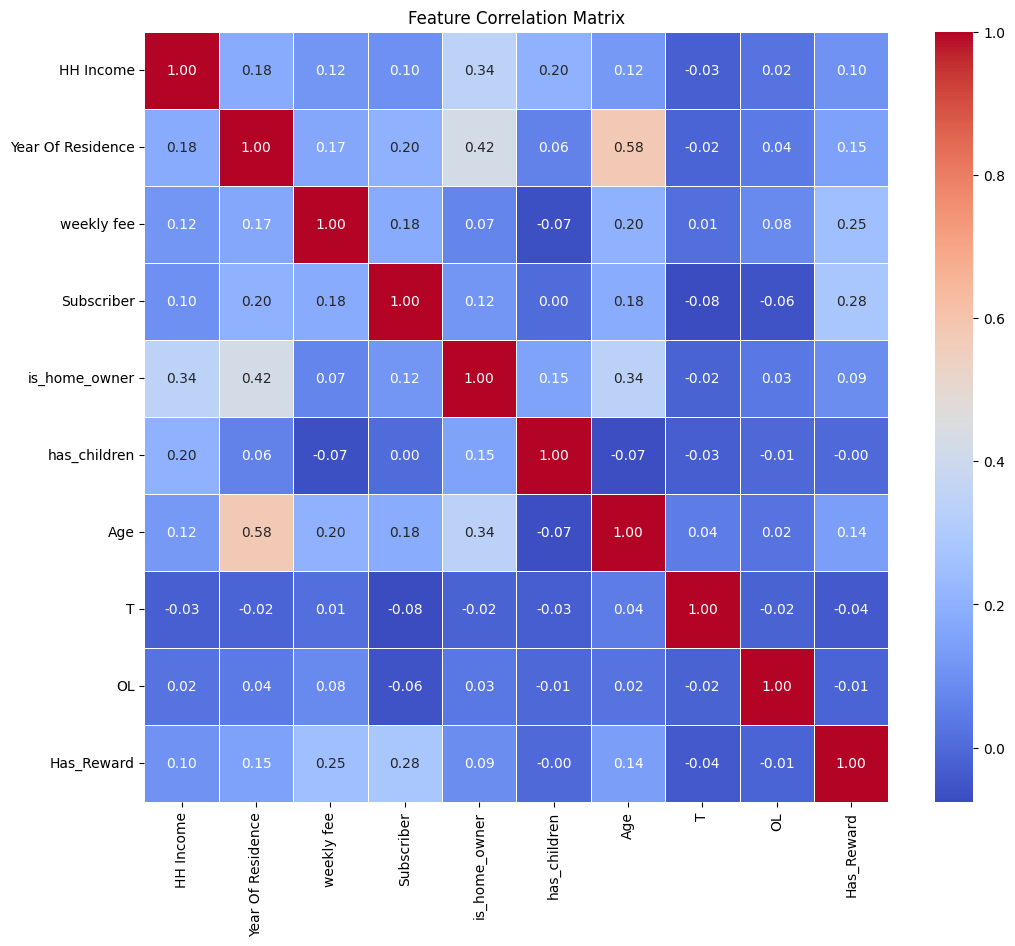

In [320]:
df_corr = df_clean.copy()

correlation_matrix = df_corr.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

Important changes: 
- Correlation with has_reward column is 0.28 (with reward program it was only 0.12),
- New correlations with range columns: Age - 0.18, weekly fee - 0.18, HH home - 0.10.

## Creating a Model

Firstly, I split the dataset to 4 parts: X_train, X_test, y_train, y_test with proportion 4:1 for train and test sets.

Using stratify = y to maintain the original class proportions

In [321]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# %pip install category-encoders
from category_encoders import WOEEncoder

X = df_clean.drop('Subscriber', axis=1)
y = df_clean['Subscriber']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

- Selecting features, Scaling and encoding (only onehot for now), 
- creating and fitting a SVM model, with first parameters kernel rbf and class_weight = 'balanced' 

class_weight = 'balanced' is used to assign high importance to minority class (subscriber = 1), to make sure the model doesn't ignore subscribers due to imbalance

In [322]:
numeric_features = ['HH Income', 'Year Of Residence', 'weekly fee', 'Age']
cat_onehot_features = ['County','Nielsen Prizm', 'Language_filtered', "Deliveryperiod_clean", "Source_Channel_clean","Ethnicity_filtered",'City_filtered']

In [323]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_onehot_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', class_weight='balanced', random_state=0, probability=True))])


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      2564
           1       0.43      0.67      0.52       607

    accuracy                           0.77      3171
   macro avg       0.67      0.73      0.69      3171
weighted avg       0.82      0.77      0.79      3171



Let's try to use other encoders for example WOEEncoder (only for object columns with many unique values)

In [324]:
X[['County','Nielsen Prizm', "Ethnicity_filtered",'Language_filtered','City_filtered', "Source_Channel_clean", "Deliveryperiod_clean"]].nunique()

County                   4
Nielsen Prizm           10
Ethnicity_filtered      40
Language_filtered       16
City_filtered           51
Source_Channel_clean    19
Deliveryperiod_clean     7
dtype: int64

In [325]:
numeric_features = ['HH Income', 'Year Of Residence', 'weekly fee', 'Age']
cat_onehot_features = ['County','Nielsen Prizm', 'Language_filtered', "Deliveryperiod_clean", "Source_Channel_clean"]
cat_other_features = ["Ethnicity_filtered", 'City_filtered']

In [326]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_onehot_features),
        ('target', WOEEncoder(), cat_other_features)
    ],
    remainder='passthrough'
)

model2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', SVC(kernel='rbf', class_weight='balanced', random_state=0, probability=True))])


model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2564
           1       0.43      0.69      0.53       607

    accuracy                           0.77      3171
   macro avg       0.67      0.74      0.69      3171
weighted avg       0.82      0.77      0.79      3171



A little better (higher recall and f1-score) with WOEEncoder, but only for Ethnicity and City. 

Trying cross_val_score (with dividing the set into 5 parts):

In [327]:
cv_scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='f1')
print(f"F1 scores: {cv_scores}")
print(f"Mean of F1s: {cv_scores.mean():.4f}")

F1 scores: [0.52056962 0.53654618 0.52631579 0.52545156 0.5235435 ]
Mean of F1s: 0.5265


Looking for best parameters (and best number of columns to use) with RandomizedSearch (it provide us to find one of the best combinations spending less time then for gridsearch)

In [328]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

model3 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('selector', SelectKBest(score_func=f_classif)),
    ('classifier', SVC(class_weight='balanced', random_state=0))])


param_distributions = [
    {'selector__k': [30, 60, 'all'],  
    'classifier__kernel': ['rbf'],
    'classifier__C': [0.1, 1, 10, 100], 
    'classifier__gamma': ['scale', 0.1, 0.01, 0.001]},

    {'selector__k': [30,60, 'all'],
    'classifier__kernel': ['linear'],
    'classifier__C': [0.1, 1, 10, 100]},

    {'selector__k': [30, 60, "all"],                     
    'classifier__kernel': ['poly'],
    'classifier__degree': [2, 3],
    'classifier__C': [1, 10]}
    ]

Choosing the best of 50 (n_iter) random combinations, and scoring f1

Used cv=5 (5-fold cross-validation) to train and evaluate the model 5 times on different data subsets, ensuring the results are stable

In [329]:
search = RandomizedSearchCV(model3, param_distributions, n_iter=50,      
                            scoring='f1', cv=5, n_jobs=-1,verbose=2,random_state=0)

search.fit(X_train, y_train)

print(f"\nBest parameters: {search.best_params_}")
print(f"Best F1: {search.best_score_:.4f}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters: {'selector__k': 60, 'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 1}
Best F1: 0.5275


Testing my best model:

In [330]:
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      2564
           1       0.43      0.70      0.53       607

    accuracy                           0.76      3171
   macro avg       0.67      0.74      0.69      3171
weighted avg       0.82      0.76      0.78      3171



And a final evaluation of my tuned model:

In [332]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('selection', SelectKBest(score_func=f_classif, k=60)),
    ('classifier', SVC(kernel='rbf', C = 1, gamma = 'scale', class_weight='balanced', random_state=0, probability=True))
])

In [333]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_scores = final_model.decision_function(X_test) 

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_scores):.4f}")

Accuracy: 0.7647
Recall: 0.7002
F1 Score: 0.5326
ROC AUC: 0.8131


additional Roc curve and Confusion Matrix visualizations:

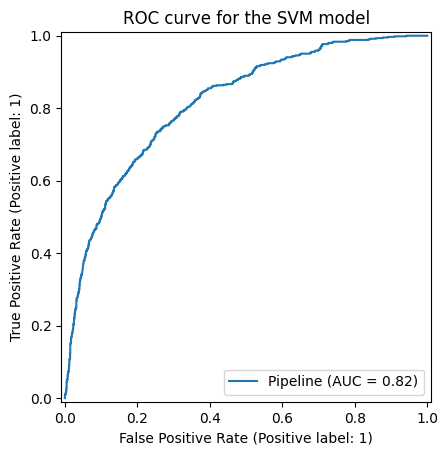

In [334]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC curve for the SVM model")
plt.show()

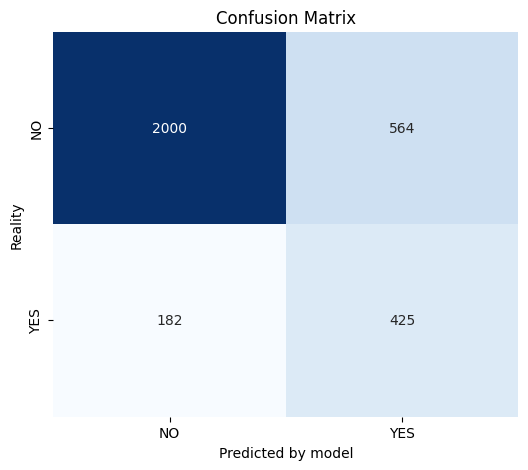

In [335]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['NO', 'YES'],
            yticklabels=['NO', 'YES'])
plt.xlabel('Predicted by model')
plt.ylabel('Reality')
plt.title('Confusion Matrix')
plt.show()